In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('Data for DataFest 2019/games.csv')

In [4]:
gps = pd.read_csv('Data for DataFest 2019/gps.csv')

In [5]:
rpe = pd.read_csv('Data for DataFest 2019/rpe.csv')

In [6]:
wellness = pd.read_csv('Data for DataFest 2019/wellness.csv')

In [367]:
gps[:10]

,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
0,1,1,2,1,00:22:01,00:00:00,0.658334,0.611112,0.005330,0.13250,0.69875,0.56500,55.466666,24.994873
1,1,1,2,2,00:22:01,00:00:00,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874
2,1,1,2,3,00:22:01,00:00:00,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874
3,1,1,2,4,00:22:01,00:00:00,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874
4,1,1,2,5,00:22:01,00:00:00,0.400000,0.444445,0.003813,-0.01750,0.85750,0.57375,55.466668,24.994874
5,1,1,2,6,00:22:01,00:00:00,0.000000,4.000003,0.003036,-0.06375,0.90375,0.55125,55.466668,24.994874
6,1,1,2,7,00:22:01,00:00:00,0.000000,0.000000,0.004433,-0.06875,1.01750,0.45375,55.466669,24.994874
7,1,1,2,8,00:22:01,00:00:00,0.000000,0.000000,0.005419,-0.09750,1.08625,0.36500,55.466669,24.994874
8,1,1,2,9,00:22:01,00:00:00,0.000000,0.000000,0.005841,-0.13000,0.88875,0.53625,55.466669,24.994874
9,1,1,2,10,00:22:02,00:00:01,0.000000,0.000000,0.007465,-0.17750,0.85250,0.58875,55.466669,24.994874


In [460]:
# check if average accelZ over 10 frames is less than a certain threshold
# accel load should be positive if the player is tackling and negative if the player is being tackled
### Explanation ###
# although negative accelZ does not indicate whether the player is tackling or being tackled, we are interested in the players
# who exert a lot of energy during the game since this leads to increased fatigue
# if the player was being tackled it likely means they had the ball or were very involved in the game (meaning they probably
# exerted non zero energy at this point in time)

playerTackles = {i:0 for i in range(1,18)}

numGames = 38
numPlayers = 17
for i in range(1,numGames + 1):
    for j in range(1, numPlayers + 1):
        avgAccelZ = gps[gps['GameID'] == i][gps['PlayerID'] == j].groupby('GameClock')['AccelZ'].mean()
        if(len(avgAccelZ) > 0):
            threshold = min(avgAccelZ) * .9 # try switching to zero value
            playerTackles[j] = playerTackles[j] + len(avgAccelZ[avgAccelZ < threshold])  

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [461]:
# accel load tell us amount of work exerted
# if we care about what is contributing to fatigue, we might count the number of times that someone exerts non zero work
# the number of times the person exerts themself in the game is one way to determine what might have contributed to fatigue
# accel load - what is the total count of times that someone has a nonzero accel load 

playerLoadCount = {i:0 for i in range(1,numPlayers + 1)}

for i in range(1,numGames + 1):
    for j in range(1, numPlayers + 1):
        avgAccelLoad = gps[gps['GameID'] == i][gps['PlayerID'] == j].groupby('GameClock')['AccelLoad'].mean()
        if(len(avgAccelLoad) > 0):
            threshold = 0 
            playerLoadCount[j] = playerLoadCount[j] + len(avgAccelLoad[avgAccelLoad > threshold])

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [552]:
playerGameCount

,PlayerID,Game Count
0,11,38
1,13,38
2,2,38
3,4,37
4,7,34
5,8,34
6,5,28
7,12,28
8,1,28
9,16,28


In [ ]:
playerLoadCount = playerLoadCount.reset_index(drop = True)
a = playerGameCount.merge(playerLoadCount, left_on = 'PlayerID', right_on = 'PlayerID')
a = (a['Load Count']/a['Game Count']).sort_values(ascending = False).reset_index()
a.columns = ['PlayerID', 'Avg Load Count']
a

In [564]:
playerTackles

,Tackle Count,PlayerID
0,1761,14
1,81,5
2,73,1
3,66,11
4,64,7
5,47,8
6,44,13
7,41,4
8,37,10
9,36,3


In [463]:
d = {'player': [*playerLoadCount.keys()], 'count': [*playerLoadCount.values()]}
playerLoadCount = pd.DataFrame.from_records(d)# accelLoadCounts match the best playes (based on number games appeared in)
playerLoadCount.columns = ['Load Count', 'PlayerID']
playerLoadCount = playerLoadCount.sort_values(by = 'Load Count', ascending = False)

,Load Count,PlayerID
10,35634,11
12,35239,13
1,35200,2
3,34215,4
6,31407,7
7,31338,8
15,26292,16
0,26259,1
4,26259,5
11,26236,12


In [466]:
d = {'player': [*playerTackles.keys()], 'count': [*playerTackles.values()]}
playerTackles = pd.DataFrame.from_records(d)# accelLoadCounts match the best playes (based on number games appeared in)
playerTackles.columns = ['Tackle Count', 'PlayerID']
playerTackles = playerTackles.sort_values(by = 'Tackle Count', ascending = False)

In [493]:
#m = playerTackles[]
playerTackles = playerTackles.reset_index(drop= True)
m = playerTackles[1:]

,Tackle Count,PlayerID
1,81,5
2,73,1
3,66,11
4,64,7
5,47,8
6,44,13
7,41,4
8,37,10
9,36,3
10,31,2


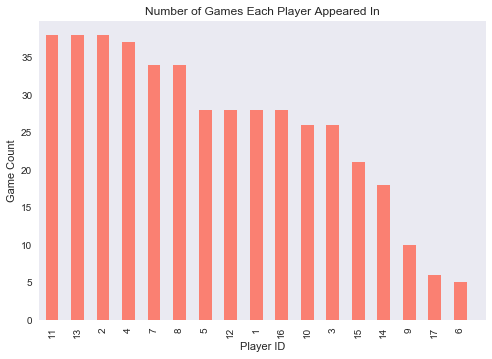

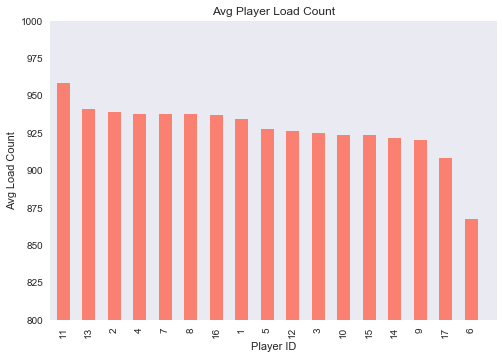

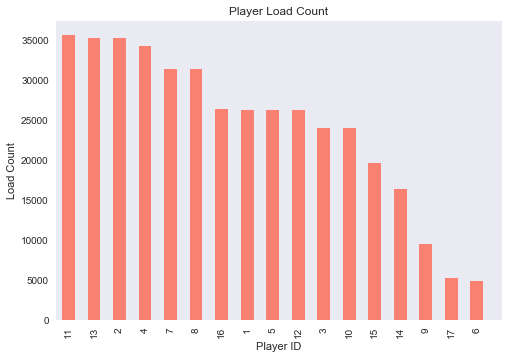

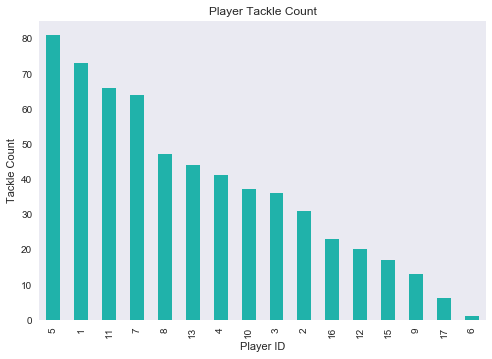

In [576]:
# Player 2, 11, 13 appeared in all games, so we can infer that they are the most valuable players on the team
playerGameCount = gps[['GameID', 'PlayerID']].drop_duplicates()['PlayerID'].value_counts().reset_index()
playerGameCount.columns = ['PlayerID', 'Game Count']
playerGameCount = playerGameCount[:17]

playerGameCount['Game Count'].plot(kind = 'bar', color = 'salmon')
plt.xticks(range(18),playerGameCount['PlayerID'].tolist())
plt.xlabel('Player ID')
plt.ylabel('Game Count')
plt.title('Number of Games Each Player Appeared In')
plt.show()

a['Avg Load Count'].plot(kind = 'bar', color = 'salmon')
plt.xticks(range(18),playerLoadCount['PlayerID'].tolist())
plt.xlabel('Player ID')
plt.ylabel('Avg Load Count')
plt.ylim(800, 1000)
plt.title('Avg Player Load Count')
plt.show()


playerLoadCount['Load Count'].plot(kind = 'bar', color = 'salmon')
plt.xticks(range(18),playerLoadCount['PlayerID'].tolist())
plt.xlabel('Player ID')
plt.ylabel('Load Count')
plt.title('Player Load Count')
plt.show()


m['Tackle Count'].plot(kind = 'bar', color = 'lightseagreen')
plt.xticks(range(16),m['PlayerID'].tolist())
plt.xlabel('Player ID')
plt.ylabel('Tackle Count')
plt.title('Player Tackle Count')
plt.show()

In [597]:
b = playerGameCount.merge(playerTackles, left_on = 'PlayerID', right_on = 'PlayerID').set_index('PlayerID')
b = (b['Tackle Count']/b['Game Count']).sort_values(ascending = False).reset_index()
b.columns = ['PlayerID', 'Avg Tackle Count']
b

,PlayerID,Avg Tackle Count
0,14,97.833333
1,5,2.892857
2,1,2.607143
3,7,1.882353
4,11,1.736842
5,10,1.423077
6,3,1.384615
7,8,1.382353
8,9,1.300000
9,13,1.157895


In [613]:
yo = playerLoadCount.merge(playerGameCount, left_on = 'PlayerID', right_on = 'PlayerID')[['PlayerID', 'Game Count']]
yo = yo.merge(b, left_on = 'PlayerID', right_on = 'PlayerID')[['PlayerID', 'Game Count', 'Avg Tackle Count']].sort_values(by = 'Avg Tackle Count', ascending = False)
yo = yo[1:].set_index('PlayerID')

In [616]:
yo = playerLoadCount.merge(playerGameCount, left_on = 'PlayerID', right_on = 'PlayerID')[['PlayerID', 'Game Count', 'Load Count']]
yo = yo.merge(playerTackles, left_on = 'PlayerID', right_on = 'PlayerID')[['PlayerID', 'Load Count', 'Tackle Count', 'Game Count']]
yo = yo.merge(a, left_on = 'PlayerID', right_on = 'PlayerID')[['PlayerID', 'Avg Load Count', 'Tackle Count', 'Game Count']]

In [617]:
yo = yo.set_index('PlayerID')

In [618]:
yo

,Avg Load Count,Tackle Count,Game Count
PlayerID,,,
11,923.230769,66,38
13,907.777778,44,38
2,926.315789,31,38
4,923.735294,41,37
7,937.000000,64,34
8,937.821429,47,34
16,958.200000,23,28
1,927.342105,73,28
5,921.705882,81,28


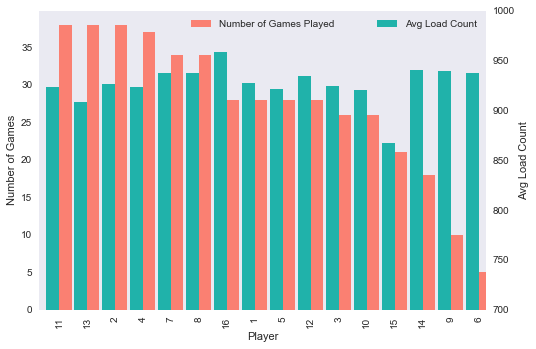

In [634]:
# We found that 11, 13, 2 were our top players since they appeared in every game and had the most amount of plays.  
# However, they did not exert the highest average load over the course of games so reducing fatigue might not be most important
# its more important to focus on efficient players.

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
 # Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx() 

width = 0.45

yo["Game Count"].plot(kind='bar', color='salmon', ax=ax, width=width, position=0, label = 'Number of Games Played')
yo["Avg Load Count"].plot(kind='bar', color='lightseagreen', ax=ax2, width=width, position=1, label = 'Avg Load Count')


ax.set_ylabel('Number of Games')
ax2.set_ylabel('Avg Load Count')
ax.set_xlabel('Player')
ax2.set_ylim(700,1000)

ax.legend(loc = 'upper center')
ax2.legend(loc = 'upper right')

plt.style.use('seaborn-dark')

plt.show()

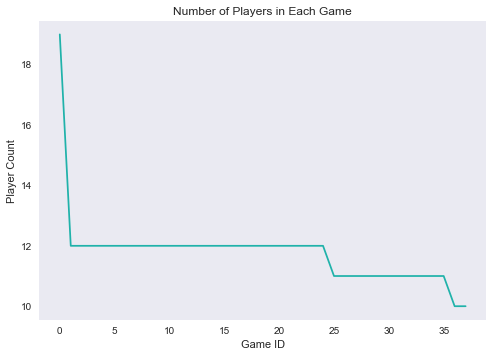

In [518]:
# Different number of players per game 
# Were there actually more people in some games or were there more people playing due to switching players?
gamePlayerCount = gps[['GameID', 'PlayerID']].drop_duplicates()['GameID'].value_counts().reset_index()
gamePlayerCount.columns = ['GameID', 'PlayerCount']
gamePlayerCount.sort_values(by = ['GameID'])
plt.plot(gamePlayerCount['PlayerCount'], color = 'lightseagreen')
plt.xlabel('Game ID')
plt.ylabel('Player Count')
plt.title('Number of Players in Each Game')
plt.show()